In [ ]:
## Dependencies
from tools import MFXDataAccessUtils
import fnmatch

# Typing
from typing import List, Dict, Any
import pandas as pd
import numpy as np

### Grab and load files

In [2]:
# Grab the paths to all the .npz files in the Data directory
files:List 
files = MFXDataAccessUtils.grab_file_paths(root="../data",
                                           filetype=".npz")

## Filter the files into the different types of data
# Photon Limit Data
PL_raw:List[str] = fnmatch.filter(files, "*PL*_raw*")
PL_filtered:List[str] = fnmatch.filter(files, "*PL*_filtered*")      # <- used in paper

# Dwell Time Data
DT_raw:List[str] = fnmatch.filter(files, "*DT*_raw*")
DT_filtered:List[str] = fnmatch.filter(files, "*DT*_filtered*")      # <- used in paper

In [3]:
## Simply load the data into memory
data_list:List = PL_raw                 # <- change this to load different data or sum all lists for the complete dataset
data:Dict[str,Dict[str,np.ndarray]] = {key.split("/")[-1].split(".")[0]: MFXDataAccessUtils.load_npz(key, print_keys=True) for key in data_list}

Keys in file: ['Z', 'Y', 'X', 'T', 'ECO', 'EFO', 'TID', 'TIC', 'ITR', 'FBG', 'ID']
Keys in file: ['Z', 'Y', 'X', 'T', 'ECO', 'EFO', 'TID', 'TIC', 'ITR', 'FBG', 'ID']
Keys in file: ['Z', 'Y', 'X', 'T', 'ECO', 'EFO', 'TID', 'TIC', 'ITR', 'FBG', 'ID']


### Load the whole dataset or selected columns to convenient formats

In [4]:
## Load data into df
data_file:str = PL_raw[0]               # <- change this to load different data
data_df:pd.DataFrame = MFXDataAccessUtils.load_npz_as_df(data_file)

# display the data
data_df.head(5)

,Z,Y,X,T,ECO,EFO,TID,TIC,ITR,FBG,ID
0,0.0,-0.000016,0.000003,0.000000,14.0,70070.07007,94.0,23396361.0,2.0,6.560060e+08,0
1,0.0,-0.000016,0.000003,0.000279,12.0,120120.12012,94.0,23775887.0,2.0,6.560060e+08,0
2,0.0,-0.000016,0.000003,0.000426,14.0,140140.14014,94.0,23781760.0,2.0,6.560060e+08,0
3,0.0,-0.000016,0.000003,0.000572,14.0,140140.14014,94.0,23787632.0,2.0,6.560060e+08,0
4,0.0,-0.000016,0.000003,0.000719,14.0,140140.14014,94.0,23793505.0,2.0,6.560060e+08,0


In [5]:
## Load to a dictionary
data_file:str = PL_raw[0]               # <- change this to load different data
data_dict:Dict[str, Any] = MFXDataAccessUtils.load_npz_as_dict(data_file)

In [6]:
## Grab Specific Data
data_file:str = PL_raw[0]                                       # <- change this to load different data
required_keys:List[str] = ["X", "Y", "T", "ID", "ECO", "EFO"]   # <- change this to load different data; ID is always required if you want to export them as tracks later

data_dict:Dict[str, Any] = MFXDataAccessUtils.load_npz_with_specific_keys(file = data_file, 
                                                                          keys = required_keys)
# dispaly the keys
data_dict.keys()

dict_keys(['X', 'Y', 'T', 'ID', 'ECO', 'EFO'])

### Track Recontruction for the entore dataset or selected columns

In [7]:
## Construct Tracks to matrices
# this will grab all data_fileds and construct tracks to matrices. The ID column is dropped and used to ID the tracks.
# The resulting dictionairy will have the track ID as the key and the matrix as the value.

data_file:str = PL_raw[0]                                       # <- change this to load different data
track_matrices_dict:Dict[str, np.ndarray] = MFXDataAccessUtils.construct_tracks_to_matrices(file = data_file)

# display first track
track_matrices_dict[0].shape

(51, 10)

In [8]:
## Contruct Tracks to dictionaries
# this will only grab the specified required_keys and construct tracks to dictionaries. 
# The ID column is dropped and used to ID the tracks.

data_file:str = PL_raw[0]                                       # <- change this to load different data
required_keys:List[str] = ["X", "Y", "T", "ID", "ECO", "EFO"]   # <- change this to load different data; ID is always required if you want to export them as tracks later

track_dict:Dict[str, Dict[str, np.ndarray]] = MFXDataAccessUtils.construct_tracks_to_dictionary(file = data_file,
                                                                                                required_keys = required_keys)

# display first track
track_dict[0].keys()

dict_keys(['Y', 'X', 'T', 'ECO', 'EFO'])

### Proof of concept plots

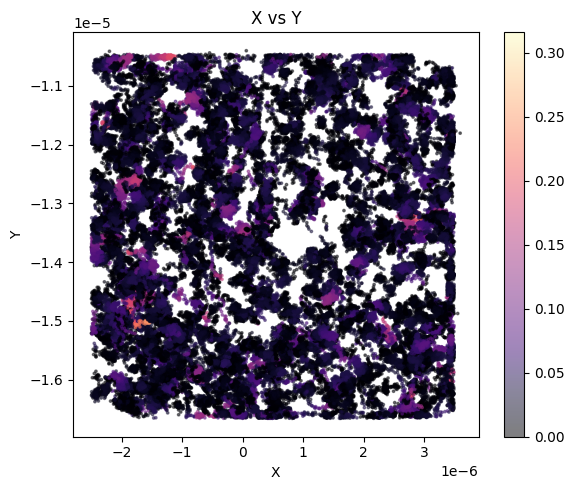

In [9]:
## Whole dataset

data:str = MFXDataAccessUtils.load_npz_as_df(PL_raw[0])     

x:str = "X"              # <- change this to display different data on the x-axis
y:str = "Y"              # <- change this to display different data on the y-axis
hue:str = "T"            # <- change this to display different data as the hue

fig, ax = MFXDataAccessUtils.overview_2d(data=data, x=x, y=y, hue=hue)

(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Track 42'}, xlabel='X', ylabel='Y'>)

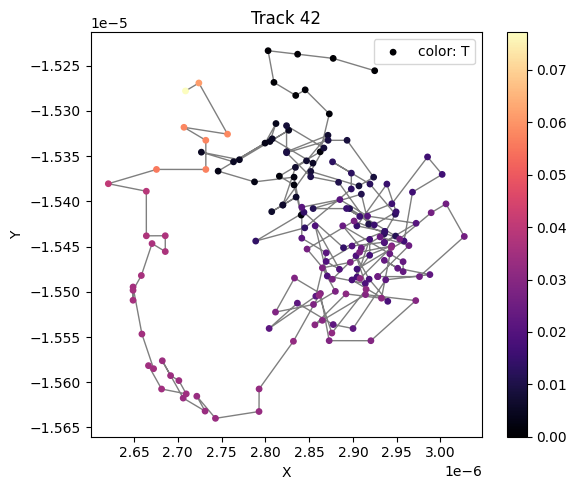

In [10]:
## plot a single track
file:str = PL_raw[0]     
track_dict:Dict[str, Dict[str, np.ndarray]] = MFXDataAccessUtils.construct_tracks_to_dictionary(file = file, required_keys=required_keys)
required_keys:List[str] = ["X", "Y", "T", "ID", "ECO", "EFO"]  
 
trac_ID:int = 42         # <- change this to display different tracks
 
x:str = "X"              # <- change this to display different data on the x-axis
y:str = "Y"              # <- change this to display different data on the y-axis
hue:str = "T"            # <- change this to display different data as the hue

MFXDataAccessUtils.show_track(track_dict = track_dict,
                              ID = trac_ID,
                              x = x, 
                              y = y,
                              hue = hue)